In [150]:
#!python

import numpy
from numpy import cos, sin, pi, absolute, arange
from scipy.signal import firwin,lfilter, firwin, freqz
from pylab import figure, clf, plot, xlabel, ylabel, xlim, ylim, title, grid, axes, show,semilogx,semilogy,loglog

In [2]:


sample_rate = 613.0
nsamples = 60
t = arange(nsamples) / sample_rate
x = 

In [277]:
#------------------------------------------------
# Create a FIR filter and apply it to x.
#------------------------------------------------

# The Nyquist rate of the signal.
nyq_rate = sample_rate / 2.0

# The desired width of the transition from pass to stop,
# relative to the Nyquist rate.  We'll design the filter
# with a 5 Hz transition width.
width = 5.0/nyq_rate

# The desired attenuation in the stop band, in dB.
ripple_db = 60.0

# Compute the order and Kaiser parameter for the FIR filter.
N=17

# The cutoff frequency of the filter.
cutoff_hz = 1.0

# Use firwin with a Kaiser window to create a lowpass FIR filter.
taps = firwin(N, cutoff_hz/nyq_rate, window='blackman', pass_zero=True, scale=True)
#taps=2*taps[0:8]
#taps=taps/(sum(taps))
#taps=numpy.ones(N)
#taps=taps/(sum(taps))
taps=taps[2:15]
taps=taps/(sum(taps))
taps=numpy.round(taps*(2**31))


# Use lfilter to filter x with the FIR filter.
filtered_x = lfilter(taps, 1.0, x)

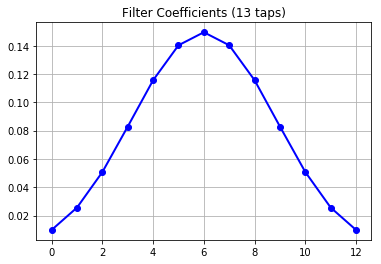

In [278]:
#------------------------------------------------
# Plot the FIR filter coefficients.
#------------------------------------------------

figure(1)
plot(taps/2**31, 'bo-', linewidth=2)
title('Filter Coefficients (%d taps)' % (taps.size))
grid(True)

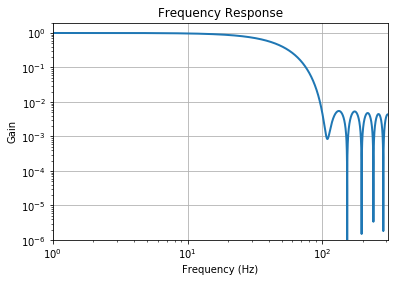

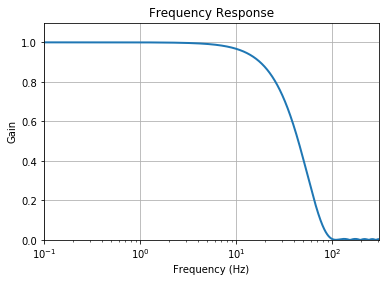

In [279]:
#------------------------------------------------
# Plot the magnitude response of the filter.
#------------------------------------------------

figure(2)
clf()
w, h = freqz(taps/2**31, worN=8000)
loglog((w/pi)*nyq_rate, absolute(h), linewidth=2)
xlabel('Frequency (Hz)')
ylabel('Gain')
title('Frequency Response')
xlim(1,nyq_rate)
ylim(1e-6, 2)
grid(True)

figure(3)
semilogx((w/pi)*nyq_rate, absolute(h), linewidth=2)
xlabel('Frequency (Hz)')
ylabel('Gain')
title('Frequency Response')
xlim(0.1,nyq_rate)
ylim(0.0, 1.1)
grid(True)

In [268]:
#------------------------------------------------
# Plot the magnitude response of the filter.
#------------------------------------------------
k=0
for val in taps:
    print("Tap ",k," = ",int(val))
    k=k+1
    
for val in taps:
    print(int(val),"L,")

Tap  0  =  21315851
Tap  1  =  55216453
Tap  2  =  109109079
Tap  3  =  178053560
Tap  4  =  248292458
Tap  5  =  301254934
Tap  6  =  320998979
Tap  7  =  301254934
Tap  8  =  248292458
Tap  9  =  178053560
Tap  10  =  109109079
Tap  11  =  55216453
Tap  12  =  21315851
21315851 L,
55216453 L,
109109079 L,
178053560 L,
248292458 L,
301254934 L,
320998979 L,
301254934 L,
248292458 L,
178053560 L,
109109079 L,
55216453 L,
21315851 L,


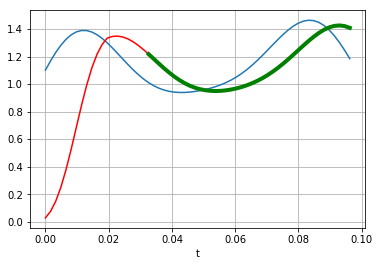

In [196]:
#------------------------------------------------
# Plot the original and filtered signals.
#------------------------------------------------

# The phase delay of the filtered signal.
delay = 0.5 * (N-1) / sample_rate

figure(3)
# Plot the original signal.
plot(t, x)
# Plot the filtered signal, shifted to compensate for the phase delay.
plot(t, filtered_x, 'r-')
# Plot just the "good" part of the filtered signal.  The first N-1
# samples are "corrupted" by the initial conditions.
plot(t[N-1:], filtered_x[N-1:], 'g', linewidth=4)

xlabel('t')
grid(True)

show()